In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm

In [3]:
import sys
import sklearn
!python --version

Python 3.9.7


In [7]:
np.__version__

'1.20.3'

In [8]:
sklearn.__version__

'0.24.2'

# DATA

In [9]:
X=np.array([
    [2,3,4],
    [2,5,6],
    [2,8,9],
    [2,9,5],
    [1,1,1]
])

In [11]:
import pandas as pd
pd.DataFrame(X)


,0,1,2
0,2,3,4
1,2,5,6
2,2,8,9
3,2,9,5
4,1,1,1


In [12]:
y=np.array([1,0,1,0,1])
y

array([1, 0, 1, 0, 1])

In [16]:
np.var(X,axis=0)

array([0.16, 8.96, 6.8 ])

In [20]:
# remove feautre with low variance
sel=feature_selection.VarianceThreshold(.17)
sel.fit(X)
sel.transform(X)

array([[3, 4],
       [5, 6],
       [8, 9],
       [9, 5],
       [1, 1]])

## univariate feautre selection


### selectKbest:classification


In [22]:
f=feature_selection.f_classif
sel=feature_selection.SelectKBest(score_func=f,k=2)
sel.fit(X,y)

SelectKBest(k=2)

In [23]:
sel.transform(X)

array([[2, 3],
       [2, 5],
       [2, 8],
       [2, 9],
       [1, 1]])

In [24]:
sel.scores_

array([0.5999897 , 0.9529415 , 0.07537712], dtype=float32)

### SelectKbest:regression 

In [27]:
f=feature_selection.f_regression
sel=feature_selection.SelectKBest(score_func=f,k=2)
sel.fit(X,y.astype('float'))
sel.transform(X)

array([[2, 3],
       [2, 5],
       [2, 8],
       [2, 9],
       [1, 1]])

# DATA

In [41]:
X,y=datasets.load_iris(return_X_y=True)


In [42]:
X.shape,y.shape

((150, 4), (150,))

### sequential feautre selection :forward

In [48]:
clf=linear_model.RidgeClassifier()
sel=feature_selection.SequentialFeatureSelector(clf,n_features_to_select=3,direction='forward')
sel.fit(X,y)
sel.transform(X).shape

(150, 3)

In [50]:
sel.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator__alpha': 1.0,
 'estimator__class_weight': None,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__normalize': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'estimator': RidgeClassifier(),
 'n_features_to_select': 3,
 'n_jobs': None,
 'scoring': None}

In [53]:
sel.get_support()

array([False,  True,  True,  True])

### sequential feautre selection :backward

In [54]:
clf=linear_model.RidgeClassifier()
sel=feature_selection.SequentialFeatureSelector(clf,n_features_to_select=3,direction='backward')
sel.fit(X,y)
sel.transform(X).shape

(150, 3)

In [55]:
sel.get_support()

array([False,  True,  True,  True])

In [56]:
sel.get_params()

{'cv': 5,
 'direction': 'backward',
 'estimator__alpha': 1.0,
 'estimator__class_weight': None,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__normalize': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'estimator': RidgeClassifier(),
 'n_features_to_select': 3,
 'n_jobs': None,
 'scoring': None}

### select from model

In [63]:
f=svm.LinearSVC(C=.01,penalty='l1',dual=False)
clf=feature_selection.SelectFromModel(f)
clf.fit(X,y)
clf.transform(X).shape

D:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(150, 3)

In [64]:
svm.LinearSVC?

In [65]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [66]:
clf.transform(X)[0:3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3]])

# Pipeline

In [79]:
clf=Pipeline([
    ('feature_selection',feature_selection.SelectFromModel(svm.LinearSVC(C=.01,penalty='l1',dual=False))),
    ('classification',linear_model.RidgeClassifier()) 
])
clf.fit(X,y)


D:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=0.01, dual=False,
                                                     penalty='l1'))),
                ('classification', RidgeClassifier())])

In [80]:
clf.get_params()

{'memory': None,
 'steps': [('feature_selection',
   SelectFromModel(estimator=LinearSVC(C=0.01, dual=False, penalty='l1'))),
  ('classification', RidgeClassifier())],
 'verbose': False,
 'feature_selection': SelectFromModel(estimator=LinearSVC(C=0.01, dual=False, penalty='l1')),
 'classification': RidgeClassifier(),
 'feature_selection__estimator__C': 0.01,
 'feature_selection__estimator__class_weight': None,
 'feature_selection__estimator__dual': False,
 'feature_selection__estimator__fit_intercept': True,
 'feature_selection__estimator__intercept_scaling': 1,
 'feature_selection__estimator__loss': 'squared_hinge',
 'feature_selection__estimator__max_iter': 1000,
 'feature_selection__estimator__multi_class': 'ovr',
 'feature_selection__estimator__penalty': 'l1',
 'feature_selection__estimator__random_state': None,
 'feature_selection__estimator__tol': 0.0001,
 'feature_selection__estimator__verbose': 0,
 'feature_selection__estimator': LinearSVC(C=0.01, dual=False, penalty='l1'),
 'f

In [82]:
clf['feature_selection'].get_support()

array([ True,  True,  True, False])

In [84]:
clf['feature_selection'].transform(X).shape

(150, 3)

# Plot

In [89]:
from sklearn import ensemble
clf=ensemble.ExtraTreesClassifier(n_estimators=10)
clf.fit(X,y)
fea_imp=clf.feature_importances_
fea_imp

array([0.08889673, 0.03218068, 0.53534695, 0.34357565])

In [94]:
data=datasets.load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'feature importance')

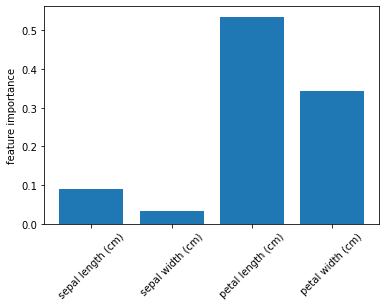

In [98]:
plt.bar(data.feature_names,fea_imp)
plt.xticks(rotation=45)
plt.ylabel('feature importance')